In [13]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import random

RANDOM_STATE = 17

In [5]:
# Cargamos los datos

X, y = load_digits(return_X_y=True)
print('Formato del dataset: {}'.format(X.shape))
print('Formato de las etiquetas: {}'.format(y.shape))
clases = np.unique(y)
print('Clases existentes en la salida: ',clases)

Formato del dataset: (1797, 64)
Formato de las etiquetas: (1797,)
Clases existentes en la salida:  [0 1 2 3 4 5 6 7 8 9]


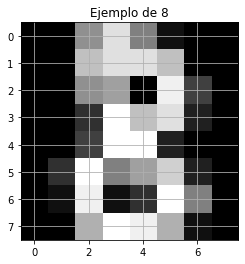

In [6]:
# Cargamos una muestra

plt.grid(True)
plt.title("Ejemplo de {}".format(y[8]))
plt.imshow(X[8, :].reshape((8, 8)), cmap='gray')

In [7]:
# Split del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
print('formato de X_train: {} - formato de y_train: {}'.format(X_train.shape,y_train.shape))

formato de X_train: (1437, 64) - formato de y_train: (1437,)


In [20]:
# Escalamos las features
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
#Cargamos el modelo
logisticRegr = LogisticRegression()
#Entrenamos el modelo con el dataset de entrenamiento
logisticRegr.fit(X_train_scaled, y_train)

LogisticRegression()

In [23]:
# Obtenemos el grado de certeza del modelo con el set de entrenamiento y de test
score_test = logisticRegr.score(X_test_scaled, y_test)
print('grado de certeza sobre el set de test: ', score_test)

score_train = logisticRegr.score(X_train_scaled, y_train)
print('grado de certeza sobre el set de entrenamiento ', score_train)

grado de certeza sobre el set de test:  0.9722222222222222
grado de certeza sobre el set de entrenamiento  0.9986082115518441


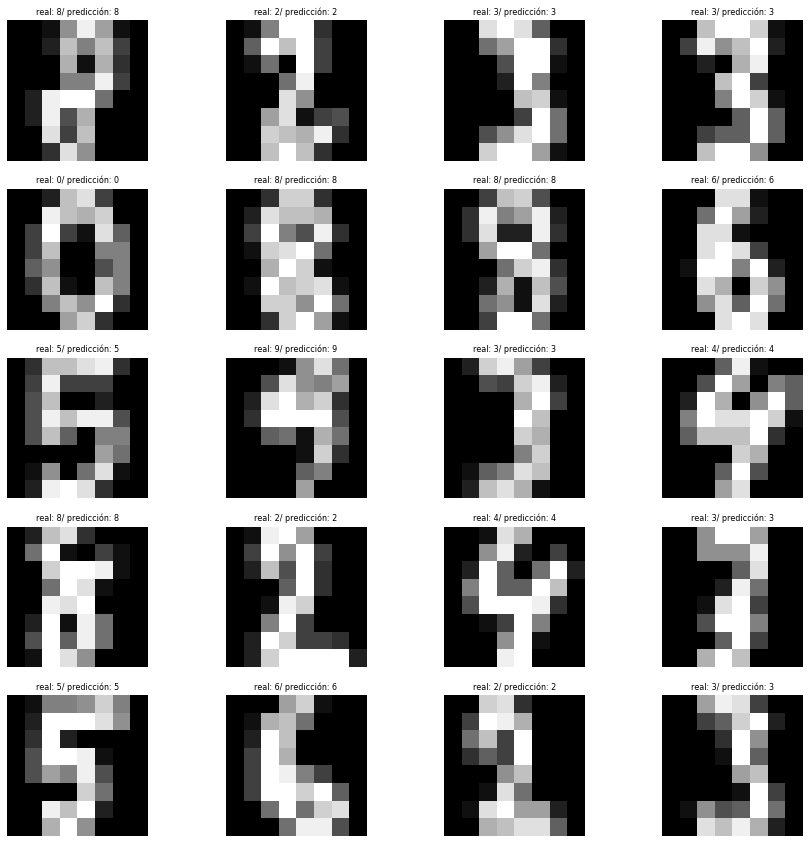

In [24]:
# Obtenemos la salida estimada por el modelo:
y_test_hat = logisticRegr.predict(X_test_scaled)

# Graficamos las primeras 20 figuras del set de test con su resultado estimado por el modelo
fig = plt.figure(figsize=(15,15))

for i in range(20):  
    ax = fig.add_subplot(5, 4, i+1)
    ax.imshow(X_test[i].reshape(8, 8), cmap=plt.get_cmap('gray'))    
    ax.set_title('real: {y}/ predicción: {y_hat}'.format(y=y_test[i], y_hat=y_test_hat[i]), fontsize=8)
    plt.axis('off')

In [27]:
# Analizamos la matriz de confusión
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y_test, y_test_hat)

In [32]:
def plotConfMx(conf_mtx, c=10):
    plt.figure(figsize=(15,15))
    plt.imshow(conf_mtx, interpolation='nearest', cmap=plt.cm.Greens)
    plt.title("Confusion Matrix")
    plt.colorbar()

    tick_marks = np.arange(c)
    plt.xticks(tick_marks, np.arange(c) , rotation=45)
    plt.yticks(tick_marks, np.arange(c))

    fmt = '.2f'
    thresh = conf_mtx.max() / 2.

    for i, j in itertools.product(range(conf_mtx.shape[0]), range(conf_mtx.shape[1])):
        plt.text(j, i, format(conf_mtx[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if conf_mtx[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

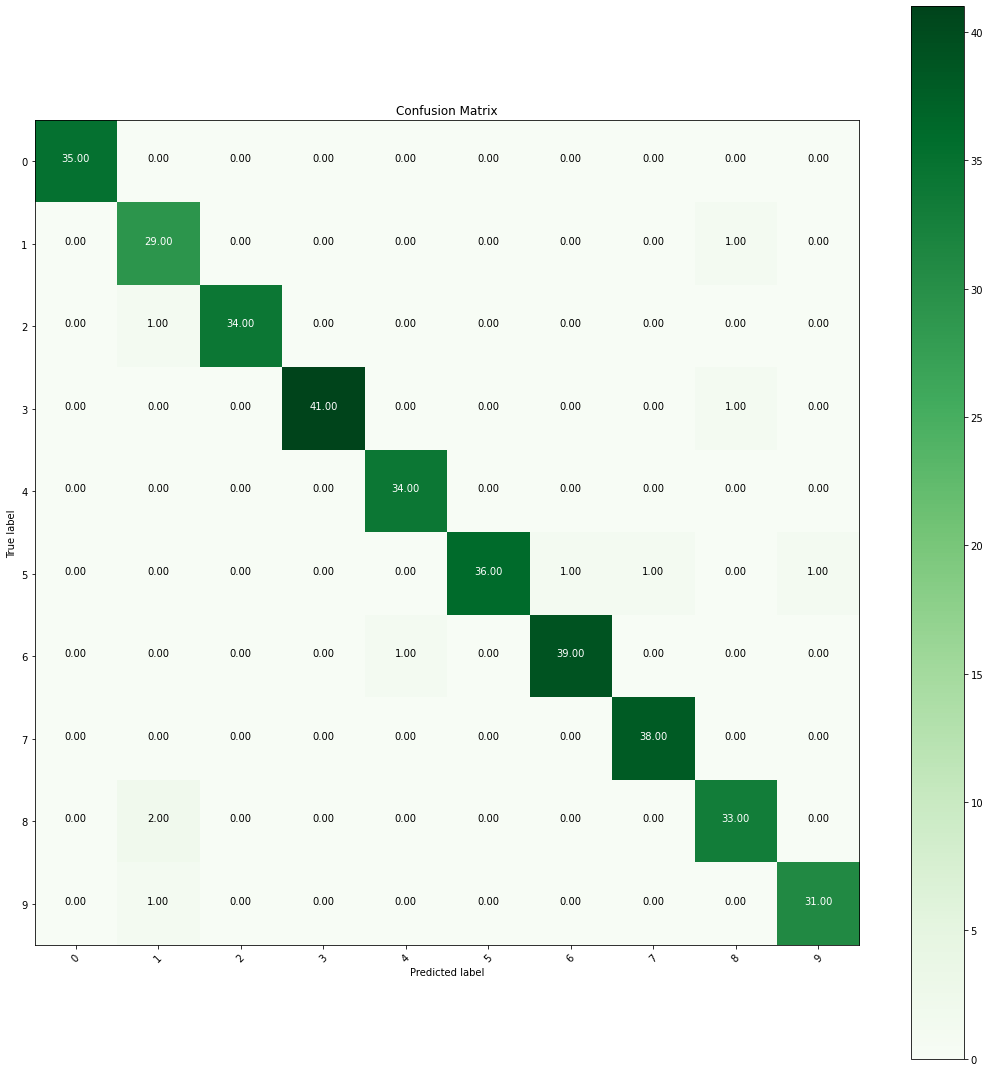

In [33]:
plotConfMx(conf_matrix)